## RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 1
### Due: 11:59 pm EST, Saturday, Oct 2, 2021

### Problem 1 (10 points)

In statistics and probability theory, the law of large numbers is a theorem that describes the result of
repeating the same experiment a large number of times. The theorem states that if the same
experiment or study is repeated independently a large number of times, the average of the results of
the trials must be close to the expected value. The result becomes closer to the expected value as the
number of trials is increased. Let us look at a specific experiment.

Assume you have a Gaussian distribution (commonly called a “bell curve”) with mean µ and std
deviation σ. The area under the curve that lies between σ and 2σ, and –σ and -2σ is approximately
27.2%. In other words, approximately 27.2% of numbers generated randomly using this distribution will
fall in the range [µ + σ, µ + 2σ] or [µ - 2σ, µ - σ], as shown below.

Generate N random numbers that follow a Gaussian distribution with µ = 100, σ = 10, and count the
numbers M that fall into the ranges above. Print the fraction M/N. Repeat this for N = 10, 100, 1000,
10000, and 1000000.

Does the fraction start to approach 27.2%?


### Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]
mu, sigma = 100, 10 # mean and standard deviation
s_ten = np.random.normal(mu, sigma, 10)
s_hun = np.random.normal(mu, sigma, 100)
s_tho = np.random.normal(mu, sigma, 1000)
s_tenthou = np.random.normal(mu, sigma, 10000)
s_mil = np.random.normal(mu, sigma, 1000000)

count_s_ten = ((110 < s_ten) & (s_ten < 120)).sum() + ((80 < s_ten) & (s_ten < 90)).sum()
count_s_hun = ((110 < s_hun) & (s_hun < 120)).sum() + ((80 < s_hun) & (s_hun < 90)).sum()
count_s_tho = ((110 < s_tho) & (s_tho < 120)).sum() + ((80 < s_tho) & (s_tho < 90)).sum()
count_s_tenthou = ((110 < s_tenthou) & (s_tenthou < 120)).sum() + ((80 < s_tenthou) & (s_tenthou < 90)).sum()
count_s_mil = ((110 < s_mil) & (s_mil < 120)).sum() + ((80 < s_mil) & (s_mil < 90)).sum()

p_s_ten = count_s_ten/10
p_s_hun = count_s_hun/100
p_s_tho = count_s_tho/1000
p_s_tenthou = count_s_tenthou/10000
p_s_mil = count_s_mil/1000000


print("percentage for N = 10 : " + str(p_s_ten*100))
print("percentage for N = 100 : " + str(p_s_hun*100))
print("percentage for N = 1000 : " + str(p_s_tho*100))
print("percentage for N = 10000 : " + str(p_s_tenthou*100))
print("percentage for N = 1000000 : " + str(p_s_mil*100))



percentage for N = 10 : 40.0
percentage for N = 100 : 25.0
percentage for N = 1000 : 28.1
percentage for N = 10000 : 27.52
percentage for N = 1000000 : 27.220100000000002


The fraction does start to approach 27.2%

### Problem 2 (5 points)

Imagine you have a dataset of movie ratings for a set of 500 popular movies and a set of 1000 users.
Each data sample contains the ratings of each movie (from 1 to 5 stars) by a specific user. The rating is
an integer in the range [0,5], with a value of 0 means that the user did not watch that movie.
How would you convert this data to a form suitable for association analysis? In particular, what type of
attributes would you have and how many of them?



### Solution

Given that we have six values to compare with (ratings from 0 to five) we can use asymetric binarization to convert the rating attribute into six binary attributes such as 'watched', 'rating 1', rating '2','rating 3', rating '4', and 'rating 5' which have values of either 0 or 1. In this form the data will be siutable for association analysis as we have one binary attribute per categorical value.

### Problem 3 (5 points)

Distinguish between noise and outliers

1. True or False ? Noise may be in the form of noisy attribute values, or noise objects.
2. True or False ? Noise is sometimes desirable.
3. True or False ? Outliers are sometimes desirable.
4. True or False ? Noise objects may or may not be outliers. Explain your reasoning.
5. True or False ? Outlier objects may or may not be noise. Explain your reasoning.

### Solution

1. True, Noise can manifest as noisy attributes or objects

2. False, Noise is never desirable

3. True, Sometimes detecting outliers is the point of the data models (for example in case of identifying fraud)

4. True, there no exclusitivity between outliers and noise, noise objects are extraneous object which can manifest as outliers or in other ways.

5. True, there no exclusitivity between outliers and noise, Outliers are just objects with characteristics that are considerably different than other data objects, this can be due to noise or other effects

### Problem 4 (20 points)
Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
1. Based on the description of the dataset provided at the site, categorize each attribute of the data as
discrete or continuous, qualitative (nominal or ordinal), or quantitative (interval or ratio)  (5 points)
e.g. Age in years: Discrete, Quantitative, Ratio.
2. Load the CSV data file into a Pandas DataFrame object and display the first 5 rows. (2 points)
3. Calculate summary statistics:
a. For each quantitative attribute: find the mean, median, standard deviation, and range. (3.5 points)
b. For each qualitative attribute, find the mode. (1.5 points)
c. Find the Interquartile Range (IQR) of the ‘price’ variable. (0.5 points)
4. What fraction of the data samples have ‘cut’ that is ‘very good’ or better ? Create a bar plot
showing the distribution of the data samples by ‘cut’ (one bar for each value of cut). (2.5 points)
5. Plot a histogram of the 'carat' variable. (2 points)
6. Plot a scatter plot of ‘carat’ vs ‘price’. (2 points)
7. Compute the correlation between ‘carat’ and ‘price’. (1 point)

### Solution

#### Solution 4.1

carat   : Continuous, quantitative  ratio (carat is a measure of weight)\
cut     : Discrete qualitative ordinal \
color   : Discrete qualitative ordinal \
clarity : Discrete qualitative ordinal \
depth   : Continuous quantitative ratio \
table   : Discrete quantitative ratio \
price   : Continuous quantitative ratio\
x       : Continuous quantitative ratio \
y       : Continuous quantitative ratio \
z       : Continuous quantitative ratio

#### Solution 4.2

In [7]:
import pandas as pd

diamonds = pd.read_csv ('diamonds.csv')
print (diamonds)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

#### Solution 4.3

In [21]:
print("Mean for quantitative attributes")
print(diamonds[["carat", "depth", "table", "price", "x", "y", "z"]].mean())
print()

print("Median for quantitative attributes")
print(diamonds[["carat", "depth", "table", "price", "x", "y", "z"]].median())
print()

print("Standard deviation for quantitative attributes")
print(diamonds[["carat", "depth", "table", "price", "x", "y", "z"]].std())
print()

print("Range for quantitative attributes")
print(diamonds[["carat", "depth", "table", "price", "x", "y", "z"]].max() - diamonds[["carat", "depth", "table", "price", "x", "y", "z"]].min()) 
print()

print("Mode for qualitative attributes")
print(diamonds[["cut", "color", "clarity"]].mode())
print()

print("IQR for the price attribute")
print(np.percentile(diamonds['price'], 75) - np.percentile(diamonds['price'], 25) )

Mean for quantitative attributes
carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

Median for quantitative attributes
carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

Standard deviation for quantitative attributes
carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64

Range for quantitative attributes
carat        4.81
depth       36.00
table       52.00
price    18497.00
x           10.74
y           58.90
z           31.80
dtype: float64

Mode for qualitative attributes
     cut color clarity
0  Ideal     G     SI1

IQR for the price attribute
4374.25


#### Solution 4.4

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

87.919911% of the data has a cut rating of VERY GOOD or better


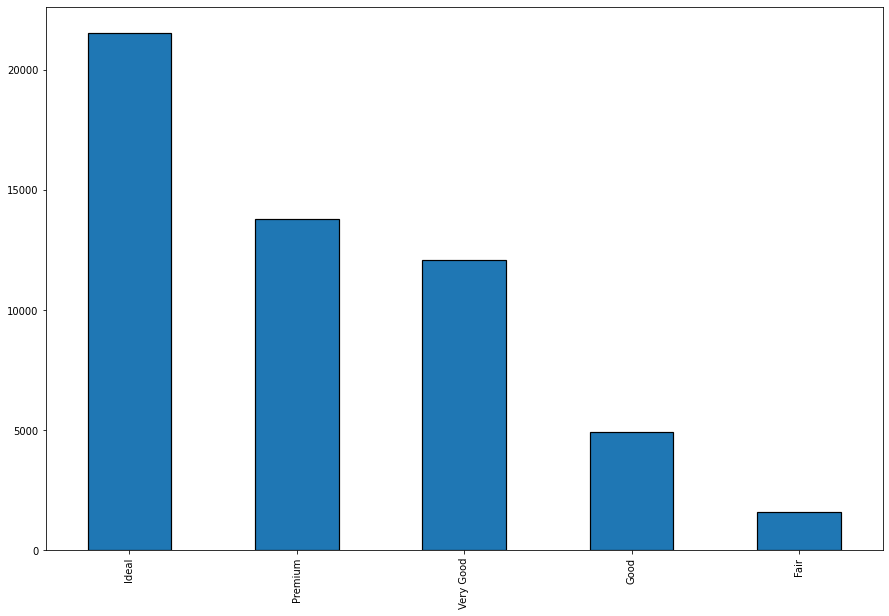

In [22]:
 value = diamonds['cut'].value_counts(normalize=True) * 100
print(value)
print()
print("87.919911% of the data has a cut rating of VERY GOOD or better")

diamonds['cut'].value_counts().plot(kind='bar', edgecolor='black', linewidth=1.2);

#### Solution 4.5

histogram for carat data


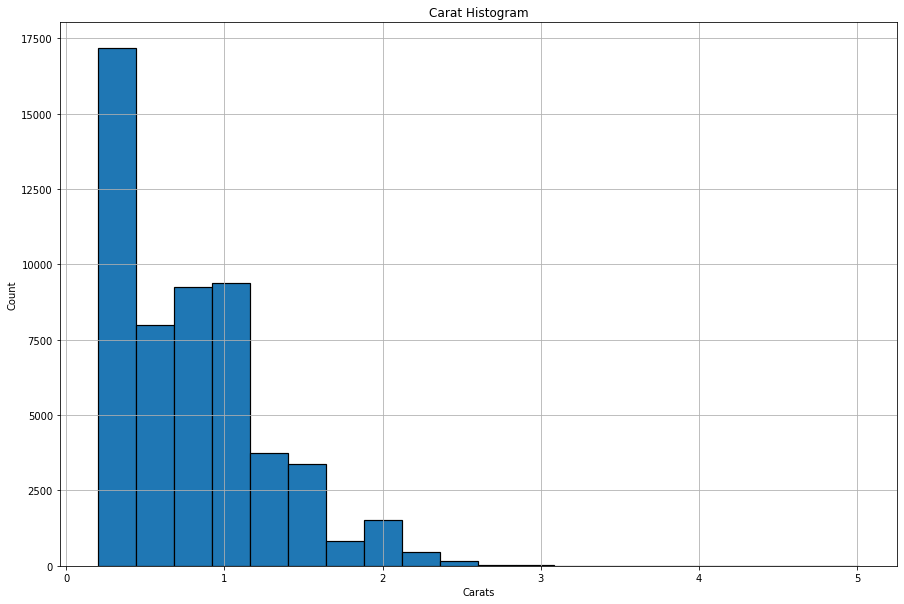

In [21]:
print("histogram for carat data")
ax = diamonds['carat'].plot.hist(bins= 20, label = 'carat', edgecolor='black', linewidth=1.2)
  
# Set title
ax.set_title("Carat Histogram")
  
# adding labels
ax.set_xlabel('Carats')
ax.set_ylabel('Count')
ax.grid()
  

#### Solution 4.6

scatter plot of ‘carat’ vs ‘price’


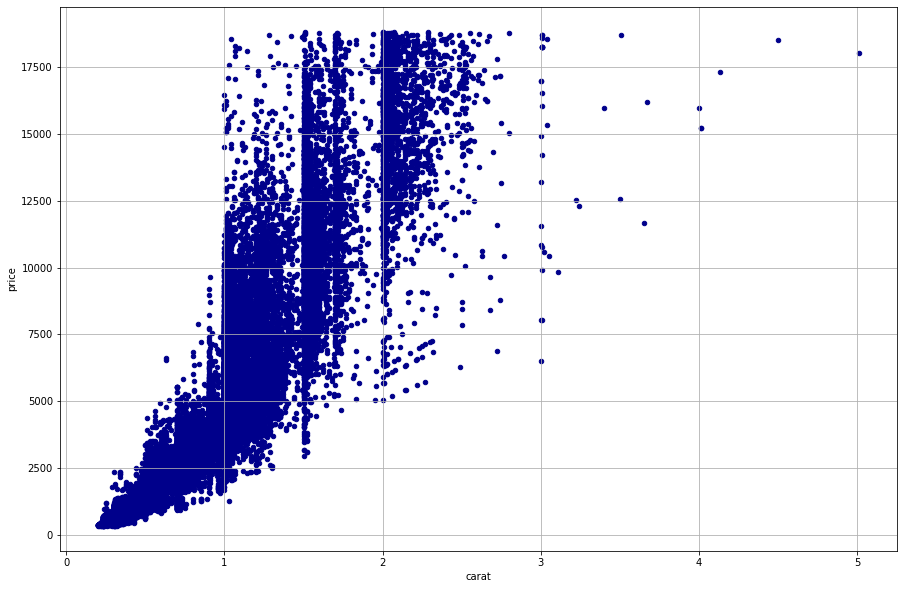

In [23]:
print("scatter plot of ‘carat’ vs ‘price’")

ax = diamonds.plot.scatter(x='carat', y='price', c='DarkBlue')
ax.grid()

#### Solution 4.7

In [64]:
print("correlation between ‘carat’ and ‘price’ - " + "%.2f" % (diamonds['carat'].corr(diamonds['price'])*100) + "%")

correlation between ‘carat’ and ‘price’ - 92.16%


### Problem 5 (4 points)

We have a collection of m documents.

Let us say we would like to compare two documents x and y using their document term vectors. 

Let tf_ij be the frequency of the ith word (term) in the jth document

1. Let the vocabulary size (the dimensionality of the vectors) be n. What is a good measure of similarity for this purpose ? Write the formula for it in terms of tf_ij.

2. Consider the variable transformation given by idf_ij = tf_ij * log(m/df_i), where df_i is the document frequency, i.e. the number of documents in which the ith term occurs. The transformed variable idf_ij is called the inverse document frequency. What are the advantages of using this transformed variable instead of the original in the similarity computation ?

### Solution

#### Solution 5.1

In the case of document term vectors, cosine similarity is a good measure of similarity for such purposes

In [1]:
#### Calculating cosine similarity between two documents x and y -
#### cos( x, y ) =  <x,y> / ||x|| ||y||
#### Assuming that the setup is 0 indexed we can calculate each term as follows -
# top_sum = 0
# bot_x = 0
# bot_y = 0
# for i in range(n):
#     top_sum += tf_ix * tf_iy
#     bot_x += tf_ix**2
#     bot_y += yf_iy**2
# return top_sum/(math.sqrt(bot_x)*math.sqrt(bot_y))

#### Solution 5.2

The transformed variable (inverse document frequency) takes into account how frequent the term is in general across the documents. Thus common words such as 'is', 'as', 'the' which occour across a majority of the documents will have low scores, this will make it easier to balance similarities between documents by giving more weight to words that are more notably similar between the documents. It prevents documents that have a high density of common words being marked as similar while still matching uncommon words between the documents

### Problem 6 (6 points)

Write Python functions to compute the Hamming (L1) distance, SMC and Jaccard similarity coefficient between two binary vectors. Use them to these proximity measures between the following vectors:

x = 1010101010101 

y = 1000100010001

### Solution

In [19]:
def hamming(x, y):
    count = 0
    for i in range(len(x)):
        if x[i] != y[i]: 
            count += 1
    
    return count

def SMC(x,y):
    count = 0
    for i in range(len(x)):
        if x[i] == y[i]: 
            count += 1
    
    return count/len(x)

def Jaccard(x,y):
    count_1 = 0
    count_0 = 0
    for i in range(len(x)):
        if x[i] == y[i] == '1': 
            count_1 += 1
        elif x[i] == y[i] == '0':
            count_0 += 1
    return count_1/(len(x) - count_0)

print("Hamming distance - " +  str(hamming('1010101010101', '1000100010001')))
print("SMC distance - " +  str(SMC('1010101010101', '1000100010001')))
print("Jaccard distance - " +  str(Jaccard('1010101010101', '1000100010001')))


Hamming distance - 3
SMC distance - 0.7692307692307693
Jaccard distance - 0.5714285714285714


### Problem 7 (6 points)

Calculate the indicated similarity or distance measures of the vectors show below (you can do this by hand or by writing code, but please show the computation either way):

x = (1,1,1,1) and y = (3,3,3,3) : cosine, correlation, Euclidean

x = (0,1,0,1,0,1) and y = (1,0,1,0,1,0) : cosine, correlation, Euclidean, Jaccard 

x = (1,1,0,1,0,1) and y = (1,1,1,0,0,1) : cosine, correlation, Lmax, Jaccard

### Solution

In [1]:
import math
def cosine(x, y):
    top_sum = 0
    bot_x = 0
    bot_y = 0
    for i in range(len(x)):
        top_sum += int(x[i])*int(y[i])
        bot_x += int(x[i])*int(x[i])
        bot_y += int(y[i])*int(y[i])
    return(top_sum/(math.sqrt(bot_x)*math.sqrt(bot_y)))

def mean(x):
    sum = 0
    for i in range(len(x)):
        sum += int(x[i])
    return sum

def covar(x, y):
    sum = 0
    mean_x = mean(x)
    mean_y = mean(y)
    for i in range(len(x)):
        sum += (int(x[i]) - mean_x)*(int(y[i]) - mean_y)
    return sum/(len(x) - 1)

def standard_dev(x):
    sum = 0
    mean_x = mean(x)
    for i in range(len(x)):
        sum += (int(x[i]) - mean_x)**2
    return math.sqrt(sum/(len(x) - 1))

def correlation(x, y):
    return covar(x, y)/(standard_dev(x) * standard_dev(y))

def euclidean(x, y):
    sum = 0
    for i in range(len(x)):
        sum += (int(x[i]) - int(y[i]))**2
    return math.sqrt(sum)

def Jaccard(x,y):
    count_1 = 0
    count_0 = 0
    for i in range(len(x)):
        if x[i] == y[i] == '1': 
            count_1 += 1
        elif x[i] == y[i] == '0':
            count_0 += 1
    return count_1/(len(x) - count_0)   

def Lmax(x,y):
    max_val = 0
    for i in range(len(x)):
        max_val = max(max_val, abs(int(x[i]) - int(y[i])))
    return max_val

print("PART 1")
print('Cosine for 1111 and 3333 is : ' + str(cosine('1111', '3333')))
print('Correlation for 1111 and 3333 is : ' + str(correlation('1111', '3333')))
print('Euclidean distance for 1111 and 3333 is : ' + str(euclidean('1111', '3333')))
print('')
print("PART 2")
print('Cosine for 010101 and 101010 is : ' + str(cosine('010101', '101010')))
print('Correlation for 010101 and 101010 is : ' + str(correlation('010101', '101010')))
print('Euclidean distance for 010101 and 101010 is : ' + str(euclidean('010101', '101010')))
print('Jaccard similarity for 010101 and 101010 is : ' + str(Jaccard('010101', '101010')))
print('')
print("PART 3")
print('Cosine for 110101 and 111001 is : ' + str(cosine('110101', '111001')))
print('Correlation for 110101 and 111001 is : ' + str(correlation('110101', '111001')))
print('Lmax distance for 110101 and 111001 is : ' + str(Lmax('110101', '111001')))
print('Jaccard similarity for 110101 and 111001 is : ' + str(Jaccard('110101', '111001')))

PART 1
Cosine for 1111 and 3333 is : 1.0
Correlation for 1111 and 3333 is : 1.0
Euclidean distance for 1111 and 3333 is : 4.0

PART 2
Cosine for 010101 and 101010 is : 0.0
Correlation for 010101 and 101010 is : 0.9230769230769231
Euclidean distance for 010101 and 101010 is : 2.449489742783178
Jaccard similarity for 010101 and 101010 is : 0.0

PART 3
Cosine for 110101 and 111001 is : 0.75
Correlation for 110101 and 111001 is : 0.9852941176470588
Lmax distance for 110101 and 111001 is : 1
Jaccard similarity for 110101 and 111001 is : 0.6


### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.